<a href="https://colab.research.google.com/github/cerean/nndl/blob/main/HW1_part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CS 84020 Neural Networks and Deep Learning
#### Homework 1
#### Andrea Ceres and Shao Liu

# **PART2**

# Listing 6
#### Load libraries. Load the Wisconsin Diagnostic Breast Cancer dataset. Data Visualization.
**Analysis**
The list of pairwise Pearson correlation of data shows that 'perimeter_mean' and 'radius_mean' have the largest correlation among all the 30 attributes. From the correlation matrix, we conclude that the 'perimeter', 'radius' and 'area' are highly correlated because the mean, se and worst value of these three attributes have have large correlation. On the other hand, 'texture' is less related to all of the three. 'fractal_dimension', 'texture', 'symmetry' and ‘smoothness’ are four features that have the least correlation with other features. The skew of data shows that 'area_se' has the most positive skew. This means 'area_se' has some extreme larger data. We can also conclude this from the density plot: For 'area_se', the tail on the right is longer than the tail on the left, because there are a few variables that have large values, which makes the tail on the right side of the curve longer.

a) Load libraries.

In [ ]:
# Load libraries
from pandas import read_csv, set_option
from pandas.plotting import scatter_matrix
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from google.colab import data_table
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer, Binarizer

In [ ]:
# Set options
set_option('display.max_columns', 32)

# plt.style.use('seaborn-talk')
plt.style.use('seaborn-white')

b) Load the dataset.

In [ ]:
# Load dataset
filename = 'http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data'
colnames = ['id', 'diagnosis', 
         'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 
         'smoothness_mean', 'compactness_mean', 'concavity_mean', 
         'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean', 
         'radius_se', 'texture_se', 'perimeter_se', 'area_se', 
         'smoothness_se', 'compactness_se', 'concavity_se', 
         'concave_points_se', 'symmetry_se', 'fractal_dimension_se', 
         'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 
         'smoothness_worst', 'compactness_worst', 'concavity_worst', 
         'concave_points_worst', 'symmetry_worst', 'fractal_dimension_worst']
dataset = read_csv(filename, names=colnames, header=None)

In [ ]:
# drop `id` identifier
dataset = dataset.drop(['id'], 1)

# recode target labels to 0 and 1
dataset['diagnosis'] = dataset['diagnosis'].map({'B':0, 'M':1})
dataset.head(3)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


c) Data visualization.

Pairwise Pearson Correlation

In [ ]:
features_pearson = list(dataset.columns[1:32])
dataset[features_pearson].corr(method='pearson')

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.679090,-0.097317,0.674172,0.735864,-0.222600,0.206000,0.194204,0.376169,-0.104321,-0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.691765,-0.086761,0.693135,0.744983,-0.202694,0.250744,0.228082,0.407217,-0.081629,-0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.732562,-0.066280,0.726628,0.800086,-0.166777,0.212583,0.207660,0.372320,-0.072497,-0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave_points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.303379,0.128053,0.313893,0.223970,0.187321,0.421659,0.342627,0.393298,0.449137,0.331786,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,0.000111,0.164174,0.039830,-0.090170,0.401964,0.559837,0.446630,0.341198,0.345007,0.688132,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


In [ ]:
pd.set_option('display.max_rows', 1000)

sorted_mat = dataset[features_pearson].corr(method='pearson').unstack().sort_values(ascending=False) 

# Print the 10 strongest positive pairwise correlations after self-correlations.
print('* Strongest Positive Correlations *\n', sorted_mat[31:].head(10))

# Print the 10 weakest pairwise correlations.
print('\n* Closest to Zero Correlations *\n', sorted_mat[:807].tail(10))

# Print the 10 strongest negative pairwise correlations.
print('\n* Strongest Negative Correlations *\n', sorted_mat.tail(10))

* Strongest Positive Correlations *
 perimeter_mean   radius_mean        0.997855
radius_worst     perimeter_worst    0.993708
perimeter_worst  radius_worst       0.993708
radius_mean      area_mean          0.987357
area_mean        radius_mean        0.987357
                 perimeter_mean     0.986507
perimeter_mean   area_mean          0.986507
area_worst       radius_worst       0.984015
radius_worst     area_worst         0.984015
perimeter_worst  area_worst         0.977578
dtype: float64

* Closest to Zero Correlations *
 smoothness_se            texture_mean               0.006614
area_mean                fractal_dimension_worst    0.003738
fractal_dimension_worst  area_mean                  0.003738
radius_se                fractal_dimension_mean     0.000111
fractal_dimension_mean   radius_se                  0.000111
perimeter_worst          fractal_dimension_se      -0.001000
fractal_dimension_se     perimeter_worst           -0.001000
texture_worst            fractal_dim

Skew for Each Attribute

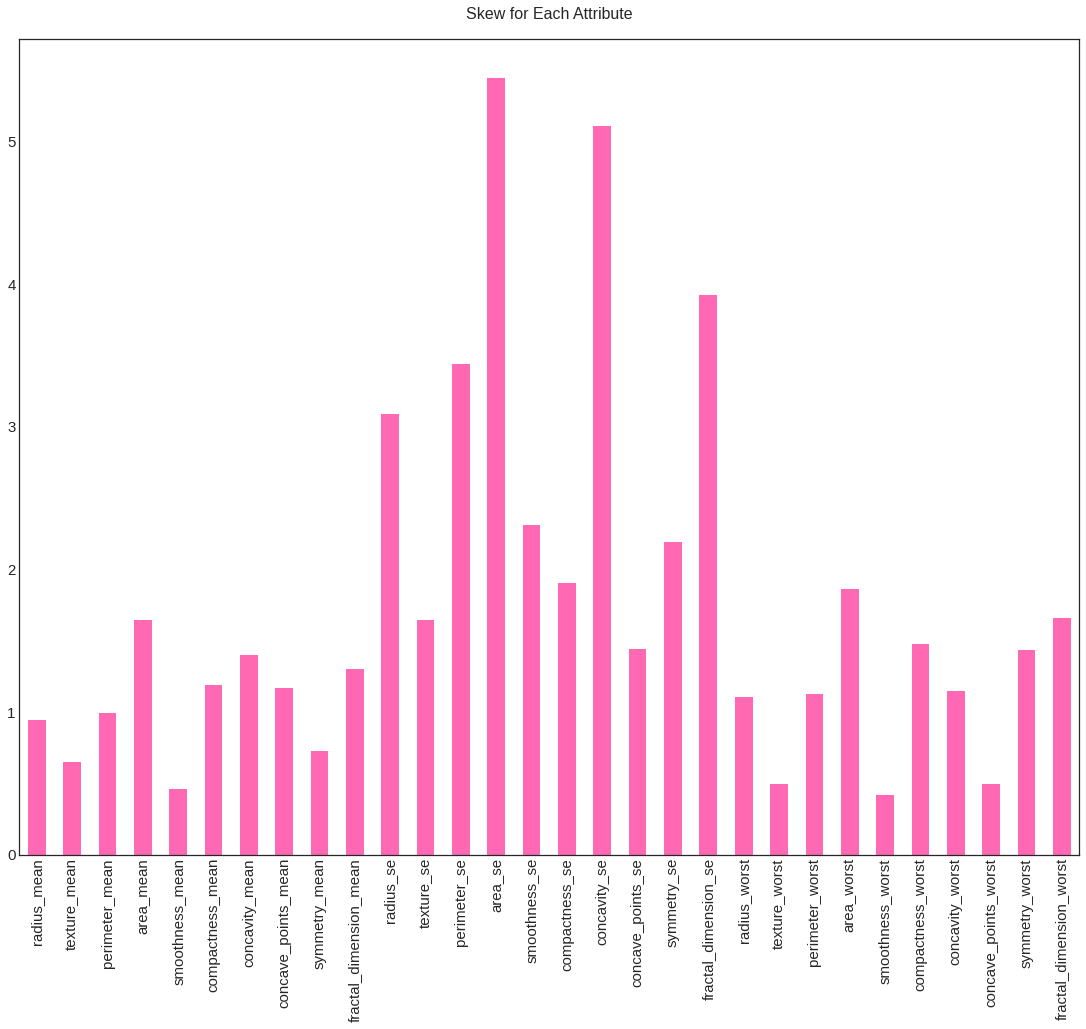

In [ ]:
features = list(dataset.columns[1:32])
s = dataset[features].skew()
plt.figure(figsize=(19, 15))
s.plot(kind = 'bar', fontsize=15, color='hotpink')
plt.title('Skew for Each Attribute', fontsize=16, pad=20);


Univariate Density Plot

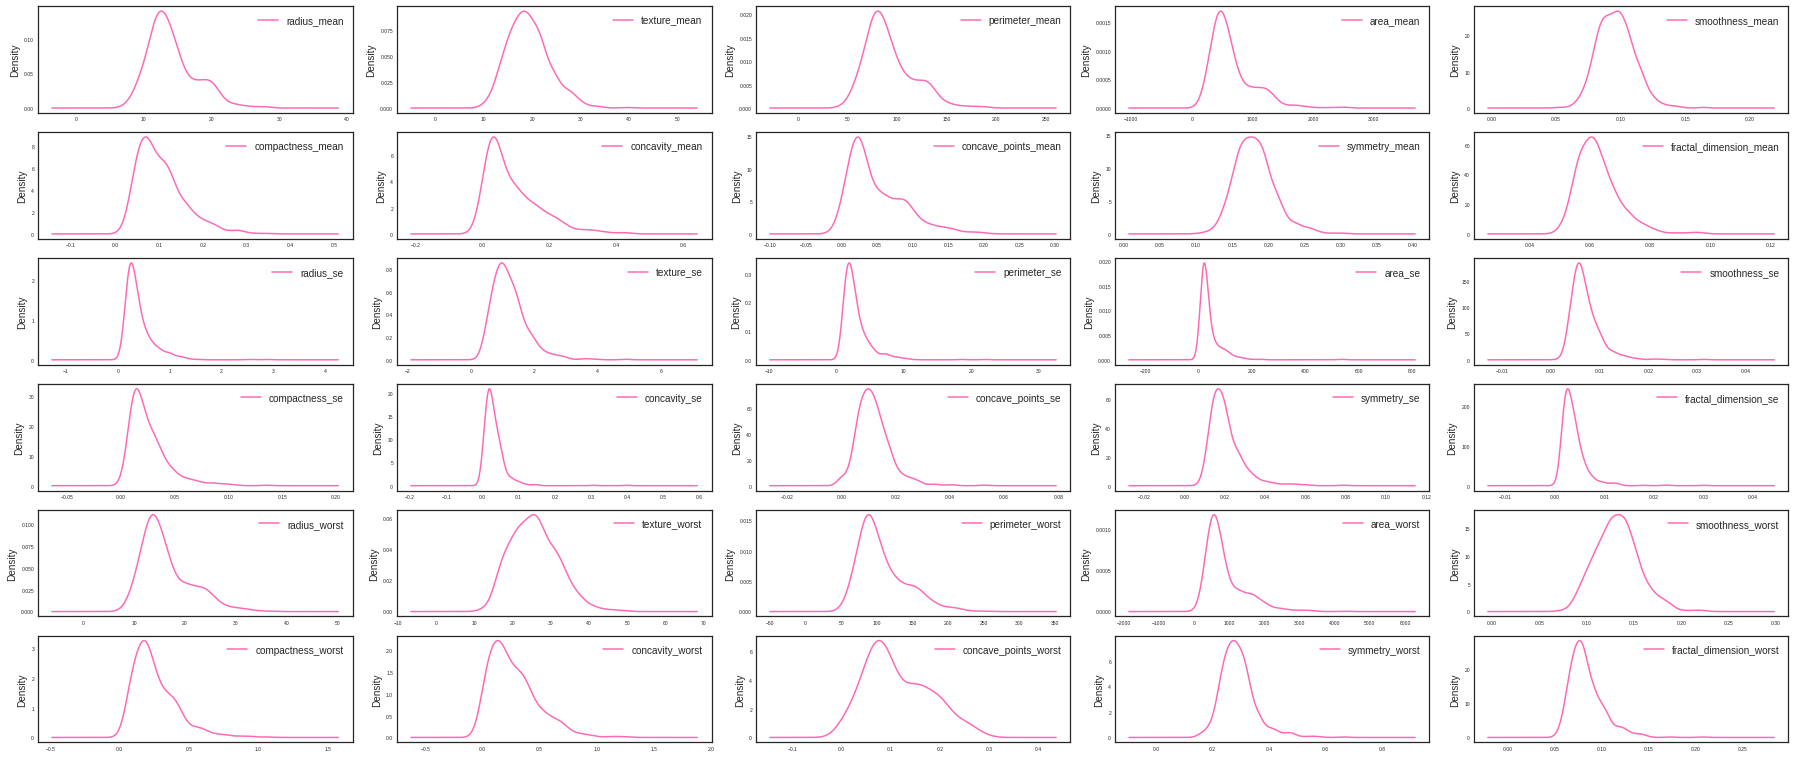

In [ ]:
dataset.select_dtypes('float').plot(kind='kde', subplots=True, layout=(20,5), figsize=(25,35), 
             sharex=False, sharey=False, fontsize=5, color='hotpink')
plt.tight_layout()
plt.show()

Correlation Matrix Plot

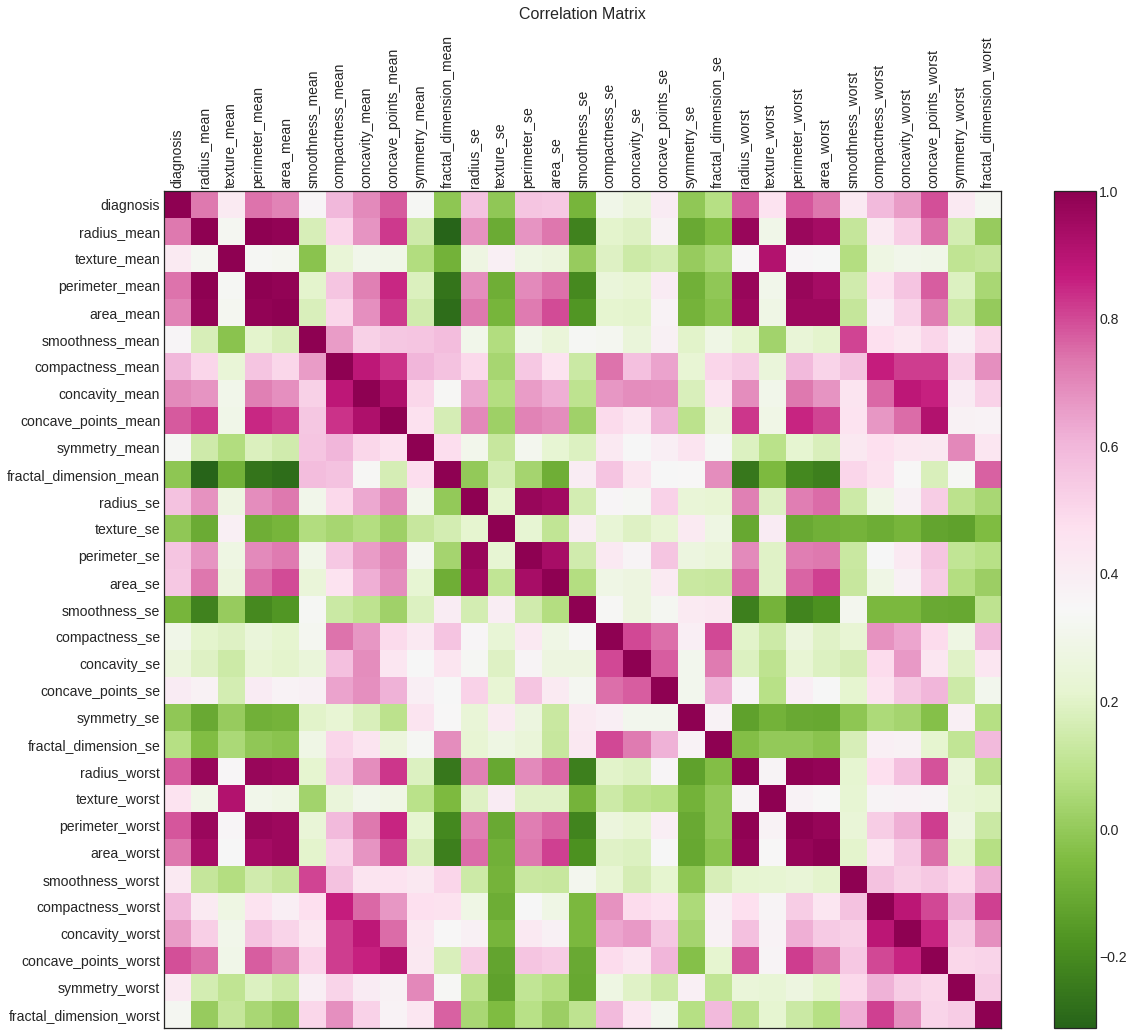

In [ ]:
f = plt.figure(figsize=(19, 15))
features = list(dataset.columns[0:32])
plt.matshow(dataset[features].corr(), fignum=f.number, cmap='PiYG_r')
plt.xticks(range(dataset[features].select_dtypes(['number']).shape[1]), dataset[features].select_dtypes(['number']).columns, fontsize=14, rotation=90)
plt.yticks(range(dataset[features].select_dtypes(['number']).shape[1]), dataset[features].select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16, pad=130);

# Listing 7
#### Rescaling Data, Standardize Data, Normalize Data, Binarize Data.
**Analysis**

The unit of measurement for each feature was not provided in the data dictionary documentation. Features such as radius have a different unit and scale than those such as texture or symmetry. Rescaling allows for all values to fall between the given interval, [0,1]. For a given feature, the new value is proportional to the original value's place inside the spread of [0, max(feature)]. For example, the texture_mean of the first value (10.38) lies closer to the original minimum (9.71) than the 25th percentile (16.17). Rescaling transforms the value from 10.38 to 0.023: (10.38 - 9.71) / (39.28 - 9.71) = 0.023

Standardization (Z-score normalization) of the data assumes Gaussian distributions of real-valued features. By standardizing to a mean of 0 and a standard deviation of 1, better performance should be seen with linear algorithms such as logistic regression and linear discriminant analysis. The minimum and maximum values are highly influenced by the presence of outliers, which may increase the overall spread. Minimum and maximum values for each feature vary, dependent on the original spread of each feature.

Normalization does not assume Gaussian distribution, and lends itself to algorithms that don't make this assumption, such as k-nearest neighbors and artificial neural networks. By having the bound at a fixed range, 0 to 1, the smaller standard deviations lead to sensitivity to outliers.

Binarization transforms the values to 0 or 1, dependent on whether each value falls below or above a given threshold. The features of this dataset all have a theoretical minimum of 0, but differing maximums. Given the differences in spread, rather than fix the threshold to a constant, we vary it based on the mean of each feature. This can be achieved by providing a list of the 30 feature means as the binarizer threshold, or by fitting and transforming on a standardized dataset and setting the threshold to the standardized mean of 0.

In [ ]:
# Set precision.
np.set_printoptions(precision=3)

In [ ]:
# Separate out target variable and print original values for first two rows.
X = dataset.values[:, 1:]
Y = dataset.values[:, 0]
print(X[0:2, :])

[[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
  7.017e-02 1.812e-01 5.667e-02 5.435e-01 7.339e-01 3.398e+00 7.408e+01
  5.225e-03 1.308e-02 1.860e-02 1.340e-02 1.389e-02 3.532e-03 2.499e+01
  2.341e+01 1.588e+02 1.956e+03 1.238e-01 1.866e-01 2.416e-01 1.860e-01
  2.750e-01 8.902e-02]]


a) Rescaling

In [ ]:
scaler_rescaled = MinMaxScaler(feature_range=(0, 1))
X_rescaled = scaler_rescaled.fit_transform(X)
print(X_rescaled[0:2, :])

[[0.521 0.023 0.546 0.364 0.594 0.792 0.703 0.731 0.686 0.606 0.356 0.12
  0.369 0.274 0.159 0.351 0.136 0.301 0.312 0.183 0.621 0.142 0.668 0.451
  0.601 0.619 0.569 0.912 0.598 0.419]
 [0.643 0.273 0.616 0.502 0.29  0.182 0.204 0.349 0.38  0.141 0.156 0.083
  0.124 0.126 0.119 0.081 0.047 0.254 0.085 0.091 0.607 0.304 0.54  0.435
  0.348 0.155 0.193 0.639 0.234 0.223]]


b) Standardization

In [ ]:
scaler_standardized = StandardScaler()
X_standardized = scaler_standardized.fit_transform(X)
print(X_standardized[0:2, :])

[[ 1.097e+00 -2.073e+00  1.270e+00  9.844e-01  1.568e+00  3.284e+00
   2.653e+00  2.532e+00  2.218e+00  2.256e+00  2.490e+00 -5.653e-01
   2.833e+00  2.488e+00 -2.140e-01  1.317e+00  7.240e-01  6.608e-01
   1.149e+00  9.071e-01  1.887e+00 -1.359e+00  2.304e+00  2.001e+00
   1.308e+00  2.617e+00  2.110e+00  2.296e+00  2.751e+00  1.937e+00]
 [ 1.830e+00 -3.536e-01  1.686e+00  1.909e+00 -8.270e-01 -4.871e-01
  -2.385e-02  5.481e-01  1.392e-03 -8.687e-01  4.993e-01 -8.762e-01
   2.633e-01  7.424e-01 -6.054e-01 -6.929e-01 -4.408e-01  2.602e-01
  -8.055e-01 -9.944e-02  1.806e+00 -3.692e-01  1.535e+00  1.890e+00
  -3.756e-01 -4.304e-01 -1.467e-01  1.087e+00 -2.439e-01  2.812e-01]]


c) Normalization

In [ ]:
scaler_normalized = Normalizer()
X_normalized = scaler_normalized.fit_transform(X)
print(X_normalized[0:2, :])

[[7.925e-03 4.573e-03 5.410e-02 4.410e-01 5.216e-05 1.223e-04 1.322e-04
  6.480e-05 1.066e-04 3.468e-05 4.824e-04 3.988e-04 3.784e-03 6.758e-02
  2.819e-06 2.160e-05 2.367e-05 6.991e-06 1.323e-05 2.728e-06 1.118e-02
  7.635e-03 8.132e-02 8.895e-01 7.146e-05 2.932e-04 3.136e-04 1.169e-04
  2.027e-04 5.238e-05]
 [8.666e-03 7.486e-03 5.599e-02 5.586e-01 3.570e-05 3.313e-05 3.661e-05
  2.956e-05 7.634e-05 2.387e-05 2.290e-04 3.092e-04 1.432e-03 3.121e-02
  2.201e-06 5.510e-06 7.836e-06 5.645e-06 5.852e-06 1.488e-06 1.053e-02
  9.862e-03 6.690e-02 8.240e-01 5.215e-05 7.861e-05 1.018e-04 7.836e-05
  1.159e-04 3.750e-05]]


d) Binarization

In [ ]:
# Print the 30 feature means.
print(X.mean(axis=0))

# Binarize X with the means as thresholds.
binarizer = Binarizer(threshold=X.mean(axis=0)).fit(X)
X_binarized = binarizer.transform(X)
print(X_binarized[0:2, :])

[1.413e+01 1.929e+01 9.197e+01 6.549e+02 9.636e-02 1.043e-01 8.880e-02
 4.892e-02 1.812e-01 6.280e-02 4.052e-01 1.217e+00 2.866e+00 4.034e+01
 7.041e-03 2.548e-02 3.189e-02 1.180e-02 2.054e-02 3.795e-03 1.627e+01
 2.568e+01 1.073e+02 8.806e+02 1.324e-01 2.543e-01 2.722e-01 1.146e-01
 2.901e-01 8.395e-02]
[[1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1.
  1. 1. 1. 1. 1. 1.]
 [1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1.
  0. 0. 0. 1. 0. 1.]]


In [ ]:
# Alternatively, binarize the standarized X with the threshold at the standard mean of 0.
binarizer = Binarizer(threshold=0).fit(X_standardized)
X_binarized = binarizer.transform(X_standardized)
print(X_binarized[0:2, :])

[[1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1.
  1. 1. 1. 1. 1. 1.]
 [1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1.
  0. 0. 0. 1. 0. 1.]]
